In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取CSV文件
df_iphone = pd.read_csv('all_iphone_data.csv')
# add a column province
# convert chinese province into english
# split from the column 'procity' eg. '广东 深圳' -> 'Guangdong'，‘上海’ -> 'Shanghai'
province_mapping = {
    '北京': 'Beijing',
    '天津': 'Tianjin',
    '河北': 'Hebei',
    '山西': 'Shanxi',
    '内蒙古': 'Inner Mongolia',
    '辽宁': 'Liaoning',
    '吉林': 'Jilin',
    '黑龙江': 'Heilongjiang',
    '上海': 'Shanghai',
    '江苏': 'Jiangsu',
    '浙江': 'Zhejiang',
    '安徽': 'Anhui',
    '福建': 'Fujian',
    '江西': 'Jiangxi',
    '山东': 'Shandong',
    '河南': 'Henan',
    '湖北': 'Hubei',
    '湖南': 'Hunan',
    '广东': 'Guangdong',
    '广西': 'Guangxi',
    '海南': 'Hainan',
    '重庆': 'Chongqing',
    '四川': 'Sichuan',
    '贵州': 'Guizhou',
    '云南': 'Yunnan',
    '西藏': 'Tibet',
    '陕西': 'Shaanxi',
    '甘肃': 'Gansu',
    '青海': 'Qinghai',
    '宁夏': 'Ningxia',
    '新疆': 'Xinjiang',
    '台湾': 'Taiwan',
    '香港': 'Hong Kong',
    '澳门': 'Macau'
}


In [229]:
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor


### 按省份看销量，不考虑总销量<2000的省份

<AxesSubplot:xlabel='province', ylabel='realSales'>

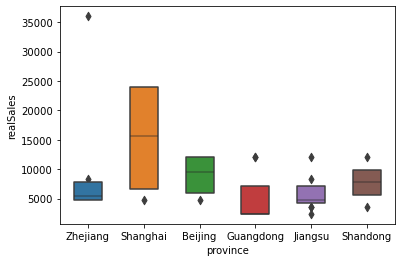

In [183]:
df_iphone['province'] = df_iphone['procity'].apply(lambda x: province_mapping.get(x.split()[0], x))
df_iphone_max_sales = df_iphone[df_iphone['realSales'] > 2000]
sns.boxenplot(data=df_iphone_max_sales, x="province", y="realSales", width=0.5)

### 此时考虑所有省份

In [173]:
df_iphone_province = df_iphone.groupby('province').mean().reset_index()
# sort from high to low by realSales
df_iphone_province = df_iphone_province.sort_values(by='realSales', ascending=False)
df_iphone_province

C:\Users\19508\AppData\Local\Temp\ipykernel_25336\380726251.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_iphone_province = df_iphone.groupby('province').mean().reset_index()


,province,price,item_id,realSales,Trade-in,Free Shipping Insurance,Free Shipping,Global Purchase,Charity Goods,Charging Power,Screen Size,Camera Number,Highest Pixel,model
10,Jiangsu,5339.346939,7.353461e+11,1506.367347,0.224490,0.346939,1.000000,0.000000,0.163265,19.918367,NaN,1.000000,3110.204082,13.653061
15,Shanghai,4324.163265,7.433087e+11,1406.448980,0.204082,0.367347,0.959184,0.061224,0.224490,20.000000,NaN,1.000000,2228.571429,13.551020
18,Zhejiang,5869.240741,7.433563e+11,1358.888889,0.111111,0.111111,0.925926,0.000000,0.074074,21.129630,NaN,1.000000,3133.333333,13.888889
1,Beijing,5726.736538,7.422181e+11,1080.923077,0.230769,0.346154,0.961538,0.000000,0.134615,19.980769,NaN,1.000000,3294.230769,14.134615
14,Shandong,4834.100000,7.198345e+11,918.000000,0.200000,0.300000,1.000000,0.300000,0.000000,22.250000,NaN,1.000000,3000.000000,14.100000
11,Jiangxi,2620.000000,7.757528e+11,432.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,NaN,1.000000,1200.000000,13.000000
13,Shaanxi,4636.285714,7.249252e+11,318.857143,1.000000,1.000000,1.000000,0.000000,1.000000,20.000000,NaN,1.000000,4028.571429,13.642857
4,Guangdong,3870.490704,7.439344e+11,292.158845,0.319495,0.601083,0.962094,0.086643,0.184116,20.895307,NaN,1.018051,2174.368231,13.261733
7,Hong Kong,2705.833333,7.643029e+11,253.000000,0.000000,0.250000,1.000000,0.000000,0.500000,20.000000,NaN,1.000000,1200.000000,12.500000
2,Chongqing,4071.750000,7.461879e+11,201.000000,0.250000,0.500000,0.750000,0.000000,0.500000,20.000000,NaN,1.000000,3900.000000,14.250000


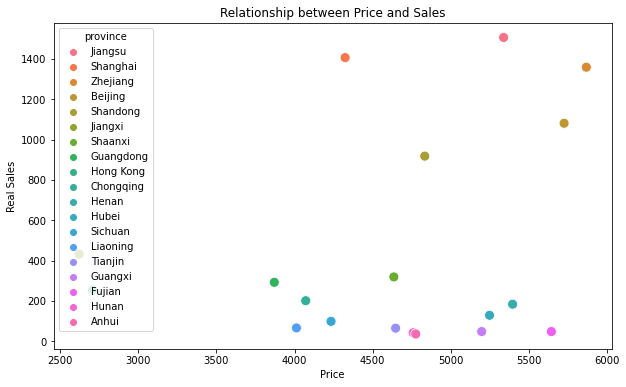

In [174]:
# 散点图：销量与价格的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_iphone_province, x='price', y='realSales', hue='province', s=100)
plt.title('Relationship between Price and Sales')
plt.xlabel('Price')
plt.ylabel('Real Sales')
plt.show()

### 按**省份**，看'price', 'Highest Pixel', 'Screen Size', 'Camera Number', 'Charging Power'与'realSales’的关系

C:\Users\19508\AppData\Local\Temp\ipykernel_25336\247757606.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_iphone_province.corr()


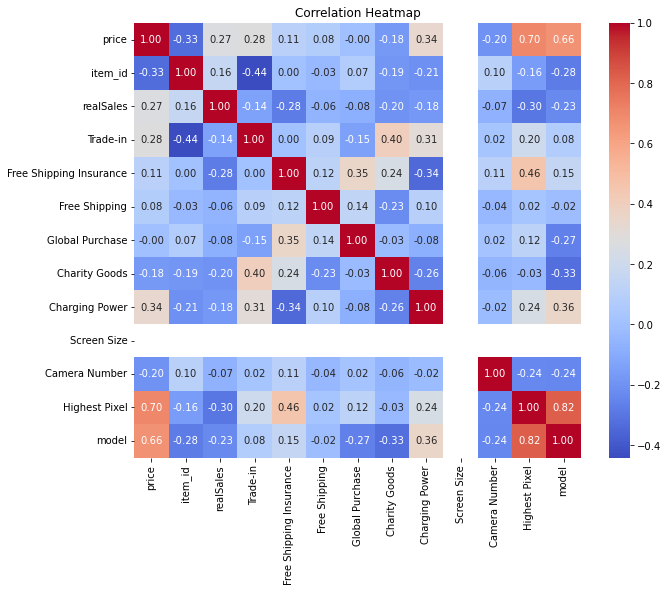

In [176]:
# 选择要分析的列
columns_to_analyze = ['realSales', 'price', 'Highest Pixel', 'Camera Number', 'Charging Power', 'Trade-in']

# 计算相关性矩阵
# correlation_matrix = df_iphone_province[columns_to_analyze].corr()
correlation_matrix = df_iphone_province.corr()

# 使用热图可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 按**型号**，看'price', 'Highest Pixel', 'Screen Size', 'Camera Number', 'Charging Power'与'realSales’的关系

C:\Users\19508\AppData\Local\Temp\ipykernel_25336\2326904360.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_iphone_model = df_iphone.groupby('model').mean().reset_index()


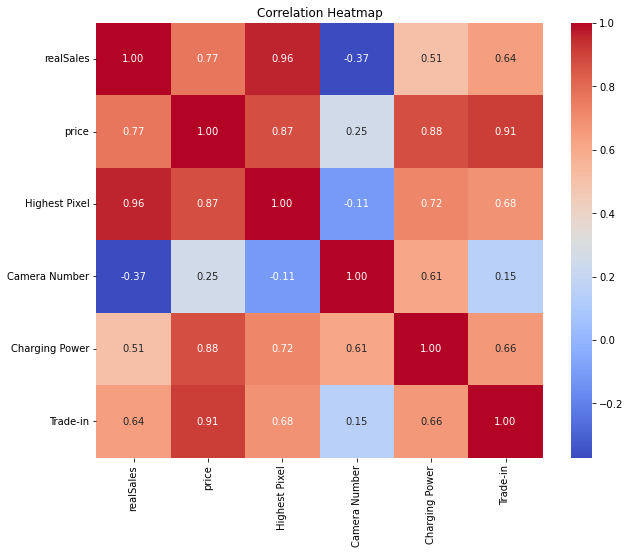

In [213]:
# group by model
df_iphone_model = df_iphone.groupby('model').mean().reset_index()

# 选择要分析的列
columns_to_analyze = ['realSales', 'price', 'Highest Pixel', 'Camera Number', 'Charging Power', 'Trade-in']

# 计算相关性矩阵
correlation_matrix = df_iphone_model[columns_to_analyze].corr()
# correlation_matrix = df_iphone_province.corr()

# 使用热图可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#### 结论
按model分类，realSales与price, highest pixel, trade-in, charging power相关性较大。

In [214]:
df_iphone_model

,model,price,item_id,realSales,Trade-in,Free Shipping Insurance,Free Shipping,Global Purchase,Charity Goods,Charging Power,Screen Size,Camera Number,Highest Pixel
0,12,2944.896104,7.449600e+11,313.818182,0.186147,0.575758,0.982684,0.038961,0.190476,20.151515,NaN,1.000000,1741.125541
1,13,3668.557940,7.298193e+11,244.326180,0.304721,0.579399,0.978541,0.081545,0.266094,19.974249,NaN,1.000000,1265.665236
2,14,4814.234802,7.326285e+11,232.969163,0.312775,0.449339,0.951542,0.114537,0.229075,21.806167,NaN,1.044053,2250.220264
3,15,5886.289631,7.507340e+11,1333.493088,0.377880,0.387097,0.935484,0.055300,0.156682,21.695853,NaN,1.000000,4800.000000


<AxesSubplot:xlabel='model', ylabel='realSales'>

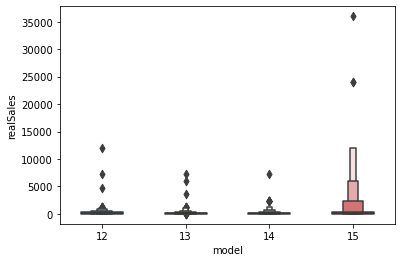

In [177]:
sns.boxenplot(data=df_iphone, x="model", y="realSales", width=0.5)

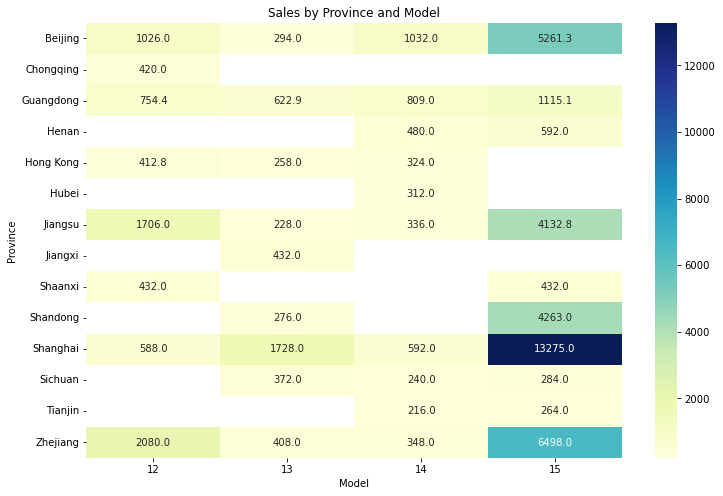

In [195]:

# 按照省份和型号分组，计算销量均值
df_sales_province_model = df_iphone_max_sales.groupby(['province', 'model'])['realSales'].mean().reset_index()
# 按照销量均值降序排列
df_sales_province_model = df_sales_province_model.sort_values(by='realSales', ascending=False)
# 不考虑销量小于100的数据
df_sales_province_model = df_sales_province_model[df_sales_province_model['realSales'] > 100]

# 热力图：不同省份和型号的平均销量
pivot_table = df_sales_province_model.pivot_table(index='province', columns='model', values='realSales')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Sales by Province and Model')
plt.xlabel('Model')
plt.ylabel('Province')
plt.show()

## 华为

In [ ]:
df_huawei = pd.read_csv('all_huawei_data.csv')

<AxesSubplot:xlabel='province', ylabel='realSales'>

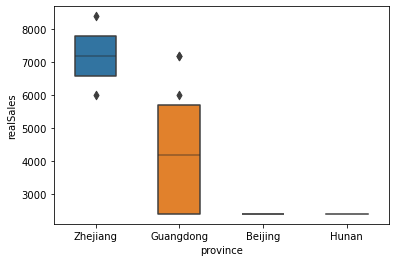

In [ ]:
df_huawei['province'] = df_huawei['procity'].apply(lambda x: province_mapping.get(x.split()[0], x))
df_huawei_max_sales = df_huawei[df_huawei['realSales'] > 2000]
sns.boxenplot(data=df_huawei_max_sales, x="province", y="realSales", width=0.5)

In [ ]:
df_huawei_province = df_huawei.groupby('province').mean().reset_index()
# sort from high to low by realSales
df_huawei_province = df_huawei_province.sort_values(by='realSales', ascending=False)
df_huawei_province

C:\Users\19508\AppData\Local\Temp\ipykernel_25336\2053591234.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_huawei_province = df_huawei.groupby('province').mean().reset_index()


,province,price,item_id,realSales,Trade-in,Free Shipping Insurance,Free Shipping,Global Purchase,Charity Goods,Charging Power,Screen Size,Camera Number,Highest Pixel
7,Hunan,9869.000000,7.596989e+11,1212.000000,0.000000,0.500000,1.000000,0.0,0.500000,88.000000,NaN,3.000000,4.800000e+03
17,Zhejiang,26918.081250,7.370161e+11,384.500000,0.208333,0.104167,0.958333,0.0,0.145833,73.166667,NaN,2.875000,8.334172e+09
3,Guangdong,4710.143369,7.504857e+11,365.634409,0.437276,0.663082,0.982079,0.0,0.086022,70.268817,NaN,2.881720,1.433799e+08
1,Beijing,5630.101852,7.528094e+11,273.333333,0.277778,0.351852,0.907407,0.0,0.101852,80.944444,NaN,2.972222,3.704080e+09
15,Tianjin,6822.818182,7.450198e+11,204.000000,0.818182,0.818182,0.818182,0.0,0.181818,84.000000,NaN,3.000000,4.945455e+03
11,Shandong,7014.545455,7.222138e+11,138.545455,0.545455,0.909091,1.000000,0.0,0.090909,78.000000,NaN,3.000000,4.927273e+03
4,Hebei,4164.777778,7.428173e+11,108.666667,0.000000,0.888889,1.000000,0.0,0.277778,71.666667,NaN,2.777778,4.444889e+10
5,Henan,5599.437500,7.423740e+11,103.500000,0.531250,0.937500,1.000000,0.0,0.031250,74.125000,NaN,2.968750,5.012500e+03
0,Anhui,749.000000,7.304510e+11,78.000000,0.000000,0.000000,1.000000,0.0,0.000000,40.000000,NaN,2.000000,2.000080e+10
10,Shaanxi,7500.750000,7.503594e+11,72.000000,0.750000,1.000000,1.000000,0.0,0.750000,77.000000,NaN,3.000000,4.950000e+03


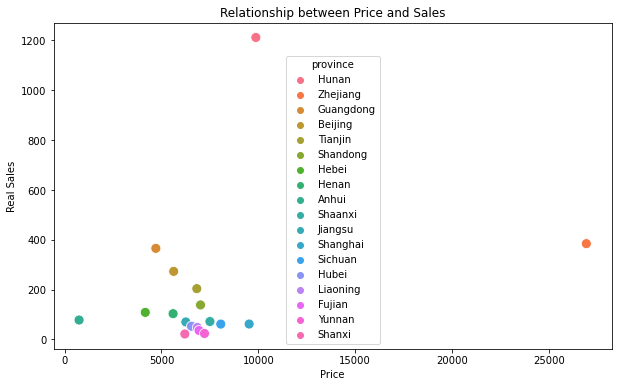

In [ ]:
# 散点图：销量与价格的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_huawei_province, x='price', y='realSales', hue='province', s=100)
plt.title('Relationship between Price and Sales')
plt.xlabel('Price')
plt.ylabel('Real Sales')
plt.show()

### 按省份

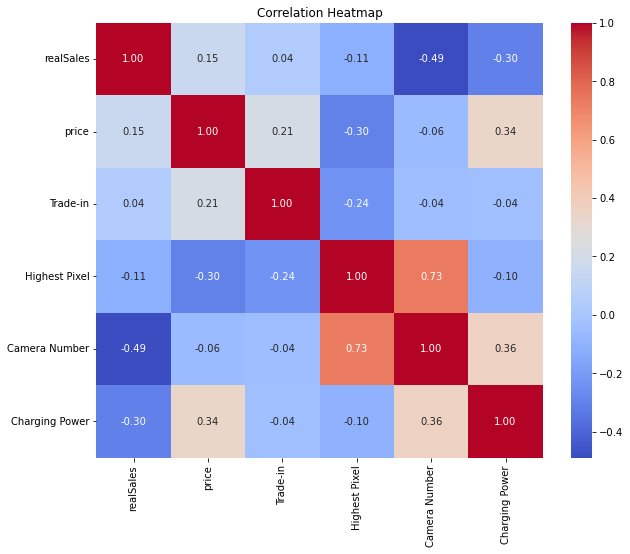

In [ ]:
# 选择要分析的列
columns_to_analyze = ['realSales', 'price', 'Trade-in', 'Highest Pixel', 'Camera Number', 'Charging Power']

# 计算相关性矩阵
correlation_matrix = df_huawei_new[columns_to_analyze].corr()

# 使用热图可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 按型号

C:\Users\19508\AppData\Local\Temp\ipykernel_25336\307685116.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_huawei_model = df_huawei.groupby('model').mean().reset_index()


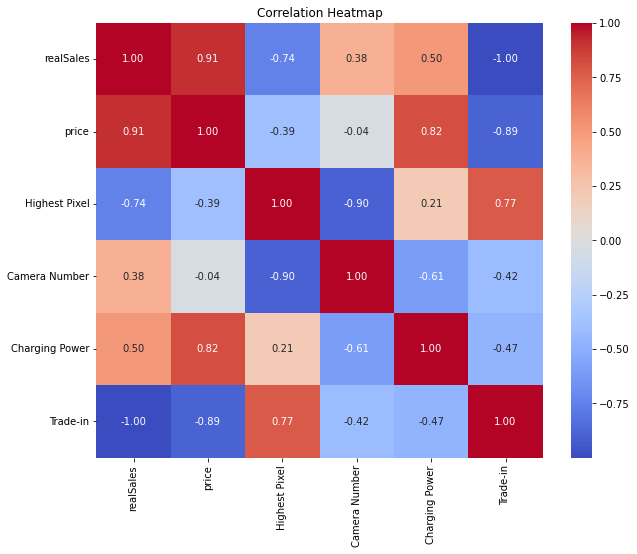

In [ ]:
# group by model
df_huawei_model = df_huawei.groupby('model').mean().reset_index()

# 选择要分析的列
columns_to_analyze = ['realSales', 'price', 'Highest Pixel', 'Camera Number', 'Charging Power', 'Trade-in']

# 计算相关性矩阵
correlation_matrix = df_huawei_model[columns_to_analyze].corr()
# correlation_matrix = df_iphone_province.corr()

# 使用热图可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:xlabel='model', ylabel='realSales'>

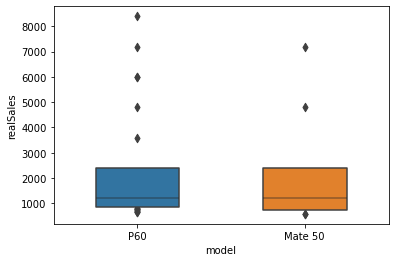

In [ ]:
sns.boxenplot(data=df_huawei_new, x="model", y="realSales", width=0.5)

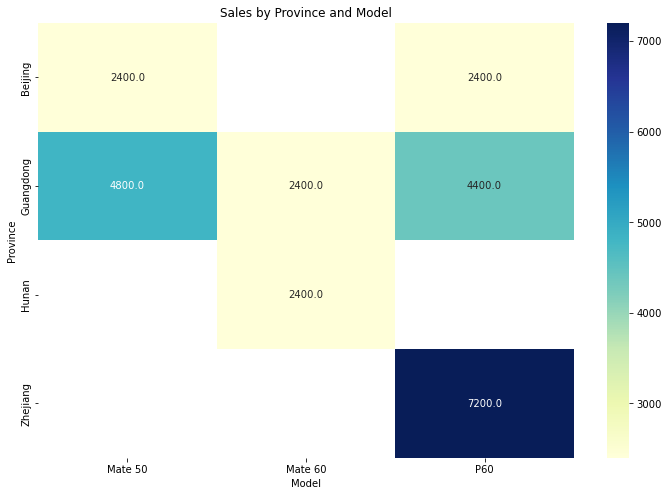

In [ ]:

# 按照省份和型号分组，计算销量均值
df_sales_province_model = df_huawei_max_sales.groupby(['province', 'model'])['realSales'].mean().reset_index()
# 按照销量均值降序排列
df_sales_province_model = df_sales_province_model.sort_values(by='realSales', ascending=False)
# 不考虑销量小于100的数据
df_sales_province_model = df_sales_province_model[df_sales_province_model['realSales'] > 100]

# 热力图：不同省份和型号的平均销量
pivot_table = df_sales_province_model.pivot_table(index='province', columns='model', values='realSales')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Sales by Province and Model')
plt.xlabel('Model')
plt.ylabel('Province')
plt.show()

## 三星

In [ ]:
df_samsung = pd.read_csv('all_samsung_data.csv')

<AxesSubplot:xlabel='province', ylabel='realSales'>

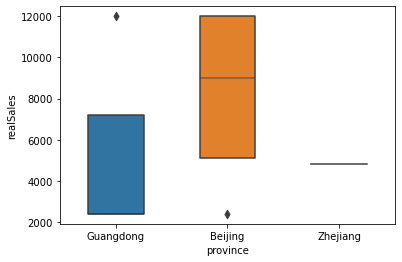

In [ ]:
df_samsung['province'] = df_samsung['procity'].apply(lambda x: province_mapping.get(x.split()[0], x))
df_samsung_max_sales = df_samsung[df_samsung['realSales'] > 2000]
sns.boxenplot(data=df_samsung_max_sales, x="province", y="realSales", width=0.5)

In [ ]:
df_samsung_province = df_samsung.groupby('province').mean().reset_index()
# sort from high to low by realSales
df_samsung_province = df_samsung_province.sort_values(by='realSales', ascending=False)
df_samsung_province

C:\Users\19508\AppData\Local\Temp\ipykernel_25336\2948443274.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_samsung_province = df_samsung.groupby('province').mean().reset_index()


,province,price,item_id,realSales,Trade-in,Free Shipping Insurance,Free Shipping,Global Purchase,Charity Goods,Charging Power,Screen Size,Camera Number,Highest Pixel
0,Beijing,5272.673913,7.483296e+11,504.913043,0.445652,0.336957,0.934783,0.000000,0.163043,40.923913,NaN,3.010870,2.467174e+04
1,Fujian,2680.555556,7.599411e+11,458.666667,0.000000,0.888889,1.000000,0.000000,0.000000,22.777778,NaN,2.000000,2.044444e+03
5,Hubei,2029.000000,7.555404e+11,444.000000,0.000000,0.000000,1.000000,0.000000,0.000000,120.000000,NaN,1.000000,5.000000e+03
13,Zhejiang,4366.532889,7.496222e+11,249.333333,0.422222,0.444444,0.911111,0.000000,0.133333,47.377778,NaN,2.644444,1.126778e+04
2,Guangdong,3759.654276,7.342641e+11,225.828947,0.365132,0.621711,0.967105,0.092105,0.253289,37.256579,NaN,2.496711,1.798847e+06
10,Shanghai,3638.136364,7.362867e+11,217.090909,0.136364,0.787879,1.000000,0.015152,0.318182,32.651515,NaN,2.469697,2.211212e+04
8,Shaanxi,2644.750000,7.317952e+11,213.000000,1.000000,1.000000,1.000000,0.000000,0.500000,125.000000,NaN,3.000000,5.000000e+03
9,Shandong,3245.650000,7.053507e+11,202.200000,0.050000,0.450000,1.000000,0.500000,0.450000,29.150000,NaN,2.450000,3.177000e+04
3,Henan,5921.333333,7.546155e+11,134.153846,0.230769,0.307692,1.000000,0.000000,0.076923,43.641026,NaN,2.846154,2.263077e+04
7,Jiangsu,4765.555556,7.018161e+11,102.666667,0.944444,0.444444,0.888889,0.000000,0.111111,56.222222,NaN,2.444444,1.613333e+04


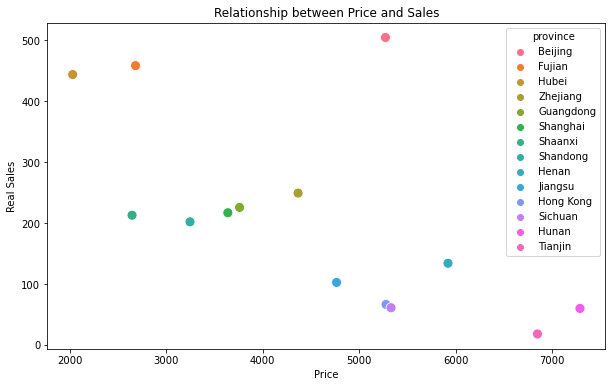

In [ ]:
# 散点图：销量与价格的关系
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_samsung_province, x='price', y='realSales', hue='province', s=100)
plt.title('Relationship between Price and Sales')
plt.xlabel('Price')
plt.ylabel('Real Sales')
plt.show()

### 按省份

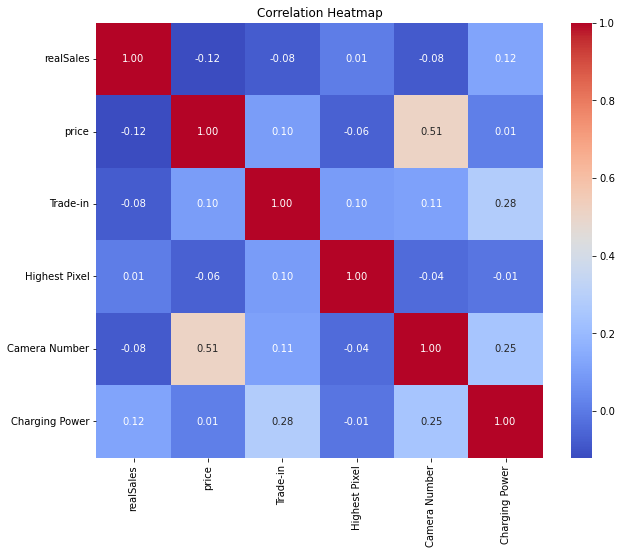

In [ ]:
# 选择要分析的列
columns_to_analyze = ['realSales', 'price', 'Trade-in', 'Highest Pixel', 'Camera Number', 'Charging Power']

# 计算相关性矩阵
correlation_matrix = df_samsung[columns_to_analyze].corr()

# 使用热图可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### 按型号

C:\Users\19508\AppData\Local\Temp\ipykernel_25336\2141696562.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_samsung_model = df_samsung.groupby('model').mean().reset_index()


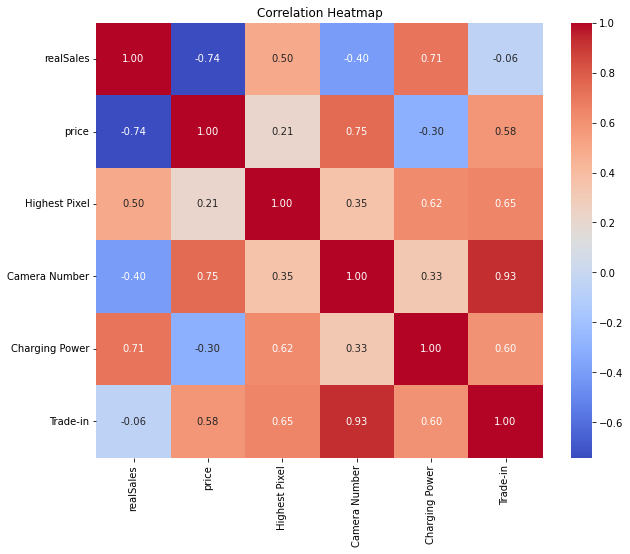

In [ ]:
# group by model
df_samsung_model = df_samsung.groupby('model').mean().reset_index()

# 选择要分析的列
columns_to_analyze = ['realSales', 'price', 'Highest Pixel', 'Camera Number', 'Charging Power', 'Trade-in']

# 计算相关性矩阵
correlation_matrix = df_samsung_model[columns_to_analyze].corr()
# correlation_matrix = df_iphone_province.corr()

# 使用热图可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
df_samsung_model

,model,price,item_id,realSales,Trade-in,Free Shipping Insurance,Free Shipping,Global Purchase,Charity Goods,Charging Power,Screen Size,Camera Number,Highest Pixel
0,Samsung S22,2447.188172,7.260779e+11,353.419355,0.301075,0.763441,0.989247,0.010753,0.301075,47.591398,NaN,2.172043,3.727634e+04
1,Samsung S23,5243.199833,7.266817e+11,111.900000,0.383333,0.491667,0.950000,0.116667,0.308333,37.283333,NaN,3.325000,5.683667e+04
2,Samsung S24,4454.475446,7.526123e+11,334.821429,0.397321,0.459821,0.950893,0.058036,0.142857,51.227679,NaN,2.933036,2.422526e+06
3,Samsung z,4186.639500,7.352094e+11,193.260000,0.270000,0.555000,0.965000,0.085000,0.235000,23.725000,NaN,2.060000,3.538000e+03


<AxesSubplot:xlabel='model', ylabel='realSales'>

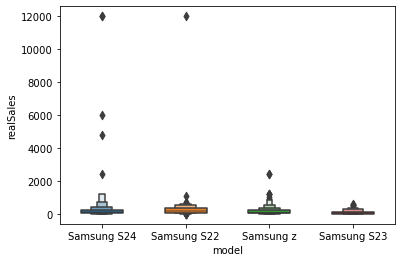

In [ ]:
sns.boxenplot(data=df_samsung, x="model", y="realSales", width=0.5)

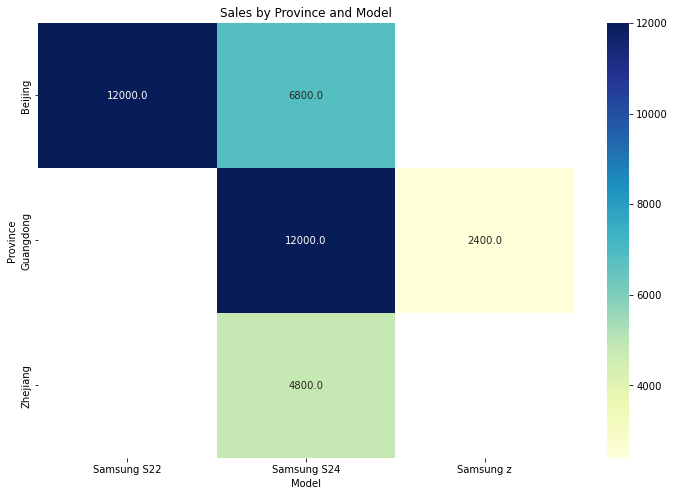

In [ ]:
# 按照省份和型号分组，计算销量均值
df_sales_province_model = df_samsung_max_sales.groupby(['province', 'model'])['realSales'].mean().reset_index()
# 按照销量均值降序排列
df_sales_province_model = df_sales_province_model.sort_values(by='realSales', ascending=False)
# 不考虑销量小于100的数据
df_sales_province_model = df_sales_province_model[df_sales_province_model['realSales'] > 100]

# 热力图：不同省份和型号的平均销量
pivot_table = df_sales_province_model.pivot_table(index='province', columns='model', values='realSales')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Sales by Province and Model')
plt.xlabel('Model')
plt.ylabel('Province')
plt.show()

## 所有品牌

### 预测 iPhone 15  （把最后预测的销量除以12，能让error的mean和std好看点）

In [264]:
df_iphone15 = pd.read_csv('iPhone/iPhone15.csv')
X = df_iphone15[['price', 'Highest Pixel', 'Trade-in', 'Charging Power']]
y = df_iphone15['realSales']
xgbmodel = xgb.XGBRegressor()
xgbmodel.fit(X, y)

# use lightGBM
lgbmodel = lgb.LGBMRegressor()
# disable warning
import warnings
warnings.filterwarnings('ignore')
lgbmodel.fit(X, y)

# use CatBoost
catmodel = CatBoostRegressor()
catmodel.fit(X, y)

# test
df_iphone15_test = pd.read_csv('new_test/iPhone 15.csv')
X_test = df_iphone15_test[['price', 'Highest Pixel', 'Trade-in', 'Charging Power']]
y_test = df_iphone15_test['realSales']
y_pred_xgb = xgbmodel.predict(X_test)
y_pred_lgb = lgbmodel.predict(X_test)
y_pred_cat = catmodel.predict(X_test)
# 评估模型
diff_xgb = (y_test - y_pred_xgb) / 12
diff_lgb = (y_test - y_pred_lgb) / 12
diff_cat = (y_test - y_pred_cat) / 12
print('XGB error: ', diff_xgb.describe())
print('LGB error: ', diff_lgb.describe())
print('Cat error: ', diff_cat.describe())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 73
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 3
[LightGBM] [Info] Start training from score 101.158333
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

#### iPhone 15 结果：
XGB error:  count     47.000000
mean      18.024400
std       56.207249
min       -3.882997
25%        1.321012
50%        4.638391
75%       10.788966
max      370.992040
Name: realSales, dtype: float64


LGB error:  count     47.000000
mean      16.387250
std       60.515815
min      -39.358874
25%       -0.465215
50%        3.534785
75%       10.171495
max      394.452634
Name: realSales, dtype: float64


Cat error:  count     47.000000
mean      16.501011
std       58.717128
min      -57.278772
25%        0.528163
50%        4.420228
75%       10.620443
max      380.755941
Name: realSales, dtype: float64

### 预测华为Mate50

In [265]:
df_huawei50 = pd.read_csv('Huawei/Huawei_mate50.csv')
X = df_huawei50[['price', 'Highest Pixel', 'Trade-in', 'Charging Power']]
y = df_huawei50['realSales']
xgbmodel = xgb.XGBRegressor()
xgbmodel.fit(X, y)

# use lightGBM
lgbmodel = lgb.LGBMRegressor()
lgbmodel.fit(X, y)

# use CatBoost
catmodel = CatBoostRegressor()
catmodel.fit(X, y)

# test
df_huawei50_test = pd.read_csv('new_test/华为Mate50.csv')
X_test = df_huawei50_test[['price', 'Highest Pixel', 'Trade-in', 'Charging Power']]
y_test = df_huawei50_test['realSales']
y_pred_xgb = xgbmodel.predict(X_test)
y_pred_lgb = lgbmodel.predict(X_test)
y_pred_cat = catmodel.predict(X_test)
# 评估模型
diff_xgb = (y_test - y_pred_xgb) / 12
diff_lgb = (y_test - y_pred_lgb) / 12
diff_cat = (y_test - y_pred_cat) / 12
print('XGB error: ', diff_xgb.describe())
print('LGB error: ', diff_lgb.describe())
print('Cat error: ', diff_cat.describe())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 79
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 4
[LightGBM] [Info] Start training from score 60.537500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

#### 华为Mate50结果：
XGB error:  count     47.000000
mean      26.739518
std       51.051532
min       -4.925560
25%        1.576412
50%        6.242650
75%       20.833372
max      199.094058
Name: realSales, dtype: float64


LGB error:  count     47.000000
mean      26.109209
std       50.565964
min       -8.492599
25%        1.285591
50%        6.566902
75%       21.822079
max      199.498211
Name: realSales, dtype: float64


Cat error:  count     47.000000
mean      27.136741
std       50.973370
min       -1.565360
25%        1.183692
50%        6.573892
75%       20.905302
max      198.978430
Name: realSales, dtype: float64

### 预测华为P60

In [266]:
df_huawei60 = pd.read_csv('Huawei/Huawei_p60.csv')
X = df_huawei60[['price', 'Highest Pixel', 'Trade-in', 'Charging Power']]
y = df_huawei60['realSales']
xgbmodel = xgb.XGBRegressor()
xgbmodel.fit(X, y)

# use lightGBM
lgbmodel = lgb.LGBMRegressor()
lgbmodel.fit(X, y)

# use CatBoost
catmodel = CatBoostRegressor()
catmodel.fit(X, y)

# test
df_huawei60_test = pd.read_csv('new_test/华为P60.csv')
X_test = df_huawei60_test[['price', 'Highest Pixel', 'Trade-in', 'Charging Power']]
y_test = df_huawei60_test['realSales']
y_pred_xgb = xgbmodel.predict(X_test)
y_pred_lgb = lgbmodel.predict(X_test)
y_pred_cat = catmodel.predict(X_test)
# 评估模型
diff_xgb = (y_test - y_pred_xgb) / 12
diff_lgb = (y_test - y_pred_lgb) / 12
diff_cat = (y_test - y_pred_cat) / 12
print('XGB error: ', diff_xgb.describe())
print('LGB error: ', diff_lgb.describe())
print('Cat error: ', diff_cat.describe())


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 240, number of used features: 4
[LightGBM] [Info] Start training from score 96.575000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

### 华为P60结果：
XGB error:  count     4.000000
mean      7.806915
std      19.332413
min     -13.992453
25%      -3.057891
50%       6.803839
75%      17.668645
max      31.612433
Name: realSales, dtype: float64


LGB error:  count     4.000000
mean      8.536356
std      19.252623
min     -13.835619
25%      -1.966514
50%       8.155539
75%      18.658409
max      31.669965
Name: realSales, dtype: float64


Cat error:  count     4.000000
mean      8.094587
std      19.546449
min     -13.752778
25%      -2.842707
50%       6.847851
75%      17.785145
max      32.435423
Name: realSales, dtype: float64

In [ ]:
df_mix = pd.read_csv('merged.csv')
# df_mix = df_mix[df_mix["price"] > 5000]
df_mix = df_mix.sort_values(by="realSales", ascending=False)
# df_mix = df_mix.head(100)

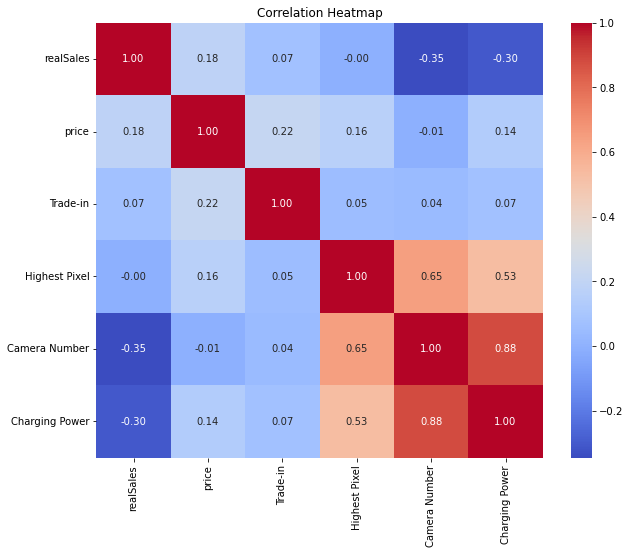

In [ ]:
# 选择要分析的列
columns_to_analyze = ['realSales', 'price', 'Trade-in', 'Highest Pixel','Camera Number', 'Charging Power']

# 计算相关性矩阵
correlation_matrix = df_mix[columns_to_analyze].corr()

# 使用热图可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\19508\AppData\Local\Temp\ipykernel_25336\5396169.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_mix_model = df_mix.groupby('model').mean().reset_index()


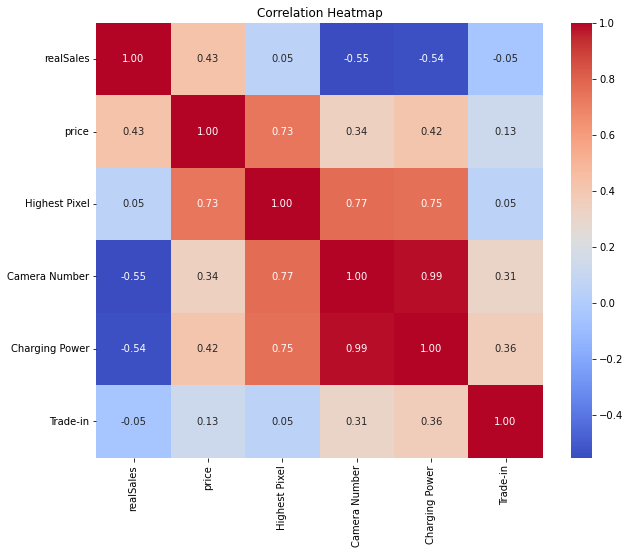

In [ ]:
# group by model
df_mix_model = df_mix.groupby('model').mean().reset_index()

# 选择要分析的列
columns_to_analyze = ['realSales', 'price', 'Highest Pixel', 'Camera Number', 'Charging Power', 'Trade-in']

# 计算相关性矩阵
correlation_matrix = df_mix_model[columns_to_analyze].corr()
# correlation_matrix = df_iphone_province.corr()

# 使用热图可视化相关性矩阵
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<AxesSubplot:xlabel='model', ylabel='realSales'>

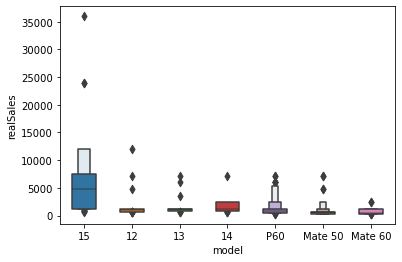

In [ ]:
sns.boxenplot(data=df_mix, x="model", y="realSales",  width=0.5)

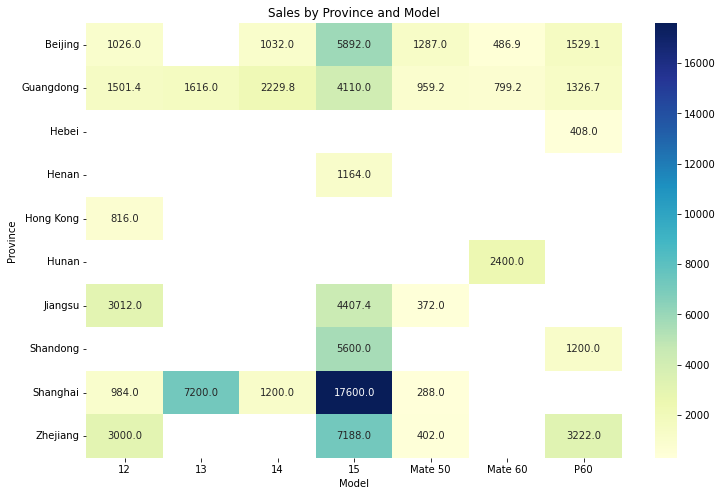

In [ ]:
df_mix['province'] = df_mix['procity'].apply(lambda x: province_mapping.get(x.split()[0], x))

# 按照省份和型号分组，计算销量均值
df_sales_province_model = df_mix.groupby(['province', 'model'])['realSales'].mean().reset_index()
# 按照销量均值降序排列
df_sales_province_model = df_sales_province_model.sort_values(by='realSales', ascending=False)
# 不考虑销量小于100的数据
df_sales_province_model = df_sales_province_model[df_sales_province_model['realSales'] > 100]

# 热力图：不同省份和型号的平均销量
pivot_table = df_sales_province_model.pivot_table(index='province', columns='model', values='realSales')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f")
plt.title('Sales by Province and Model')
plt.xlabel('Model')
plt.ylabel('Province')
plt.show()